# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import datetime
import nltk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load Data

In [2]:
df_tweets = pd.read_csv('C:/Users/melin/Documents/Springboard Data Science Career Track/Capstone Projects/Capstone Project 2/df_tweets.csv')
df_tweets.head()

,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,followers_count,friends_count,account_created_at,verified,lang,cleaned_text
0,2020-03-31 04:11:43,sannidhi_perla,"1/4\n@PMOIndia, Amid the #coronavirus lock dow...",Twitter Web App,False,False,666,2,116,25,2017-10-20 15:36:13,False,en,amid coronaviru lock thi humbl appeal behalf p...
1,2020-04-01 21:49:12,amberbowens,"🤔Why are they talking about a ""war on drugs"" a...",Twitter Web App,False,False,608,0,163,224,2009-07-05 22:35:05,False,en,think face whi talk war drug drug cartel thi r...
2,2020-04-17 14:36:04,bradyparker,Sen. John Thune on paycheck protection program...,IFTTT,False,False,8,0,4570,2610,2009-05-04 13:41:24,False,en,sen john thune paycheck protect program run mo...
3,2020-04-13 02:13:07,Davidmetroland,@DavidGSmith18 @mindedmusically @Rudy48053087 ...,Twitter Web App,False,False,31610,0,990,820,2015-05-08 02:30:10,False,en,air travel make thi type pandem risk coronavir...
4,2020-04-18 03:01:40,yipmann82,@omotforest @matteous_ @anileh2 @GuidoFawkes I...,Twitter for Android,False,False,2865,0,326,523,2015-08-20 09:50:46,False,en,see ani front liner say got enough ppe tell fo...


# Examining Word Frequency

In [3]:
#Create a table of the 20 most frequent words from the uncleaned text column
print('20 Most Frequent Words of "text" in df_tweets')
text_unclean = Counter(" ".join(df_tweets['text']).split()).most_common(20)
for word, count in text_unclean: #having the keys and counts to be printed out of dictionary
    print(word + ": " + str(count))

20 Most Frequent Words of "text" in df_tweets
the: 674778
to: 586046
of: 386205
and: 350177
#COVID19: 339461
in: 304496
a: 275662
is: 227255
for: 221186
#coronavirus: 219337
on: 154381
are: 144375
you: 120297
with: 114745
this: 112615
that: 103839
from: 99149
I: 98065
be: 95554
have: 95155


100 Most Frequent Words of "text" in df_tweets


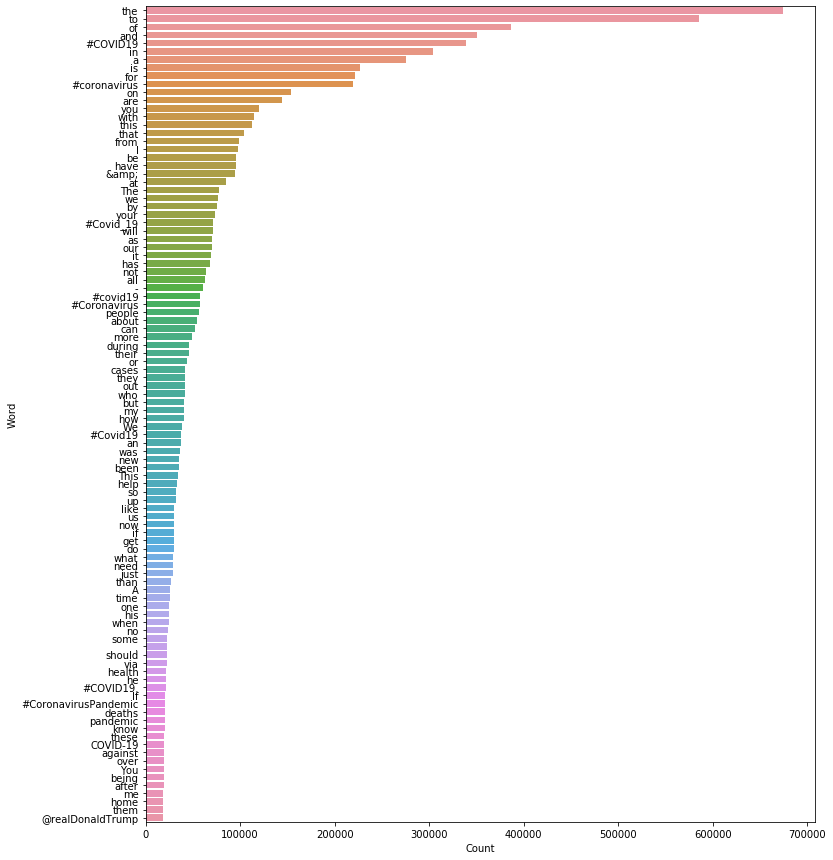

In [4]:
#Create a function that makes a word frequency bar plot
def freq_words(x, terms): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(xlabel = 'Count', ylabel = 'Word')  
  plt.show()
  
#print 100 most frequent words of the text column in the reduced df_tweets dataframe
print('100 Most Frequent Words of "text" in df_tweets')
freq_words(df_tweets['text'], 100)

In [5]:
#Remove rows containing missing values under the cleaned_text column 
df_tweets = df_tweets[df_tweets['cleaned_text'].notnull()]

#Create a table of the 20 most frequent words from the cleaned text column
print('20 Most Frequent Words of "cleaned_text" in df_tweets')
text_clean = Counter(" ".join(df_tweets['cleaned_text']).split()).most_common(20)
for word, count in text_clean: #having the keys and counts to be printed out of dictionary
    print(word + ": " + str(count))

20 Most Frequent Words of "cleaned_text" in df_tweets
covid: 699781
coronaviru: 359225
thi: 162000
ha: 106368
amp: 100994
face: 74398
peopl: 74318
u: 72071
case: 66149
pandem: 65983
new: 54531
time: 52918
help: 52548
death: 52325
dure: 50943
need: 48770
test: 47353
get: 47270
lockdown: 45677
day: 45286


100 Most Frequent Words of "cleaned_text" in df_tweets


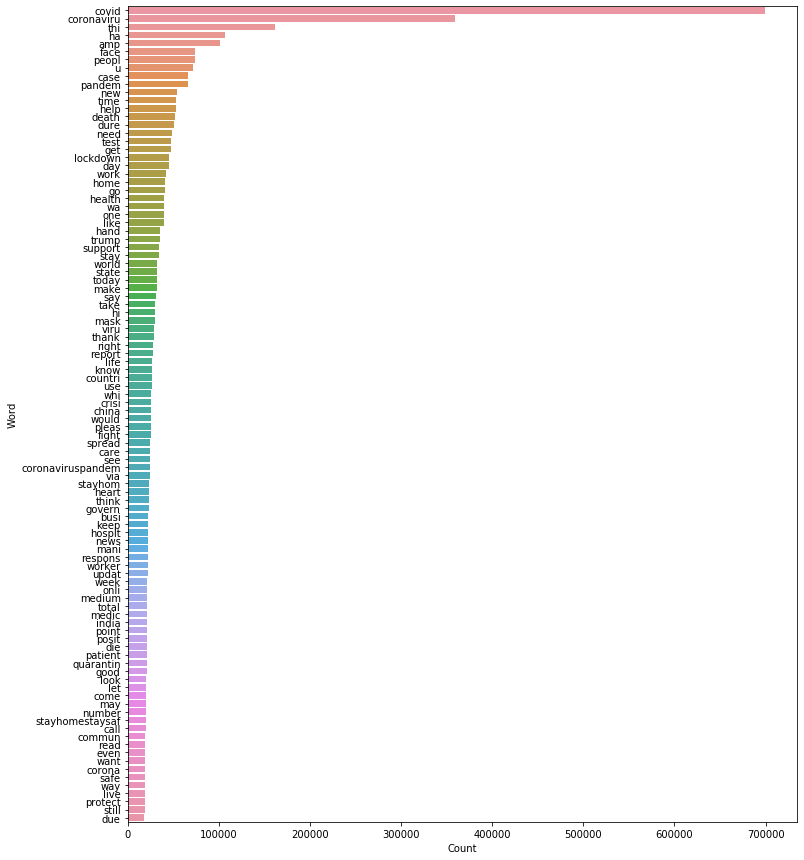

In [6]:
# print 100 most frequent words of the cleaned_text column in the reduced df_tweets dataframe
print('100 Most Frequent Words of "cleaned_text" in df_tweets')
freq_words(df_tweets['cleaned_text'], 100)

# Initial Statistical Analysis

Text(0, 0.5, 'Twitter Account Verified')

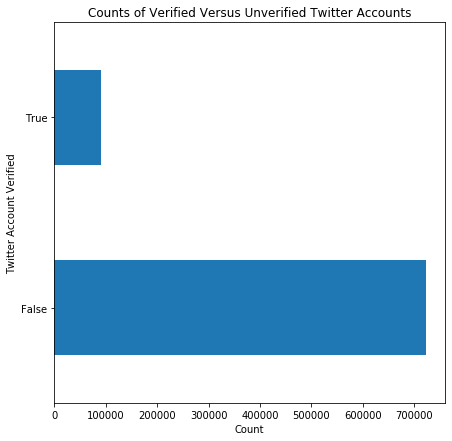

In [7]:
# Create horizontal barplot displaying number of verified and unverified Twitter accounts
plt.figure(figsize=(7, 7))
CountVerified = pd.value_counts(df_tweets['verified'].values, sort=True)
CountVerified.plot.barh()
plt.title('Counts of Verified Versus Unverified Twitter Accounts')
plt.xlabel("Count")
plt.ylabel("Twitter Account Verified")

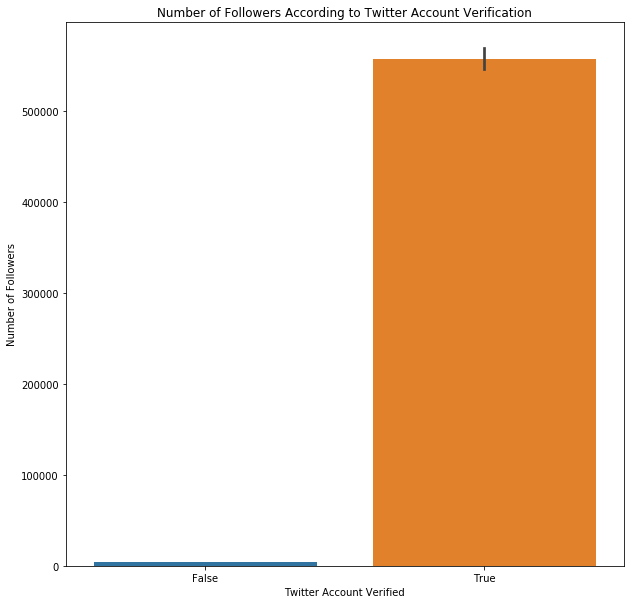

In [8]:
# Create barplot comparing the verified variable to the followers_count variable
plt.figure(figsize=(10,10)) 
ax = sns.barplot(data=df_tweets, x= "verified", y = "followers_count") 
ax.set(xlabel = 'Twitter Account Verified', ylabel = 'Number of Followers', title = 'Number of Followers According to Twitter Account Verification')  
plt.show()

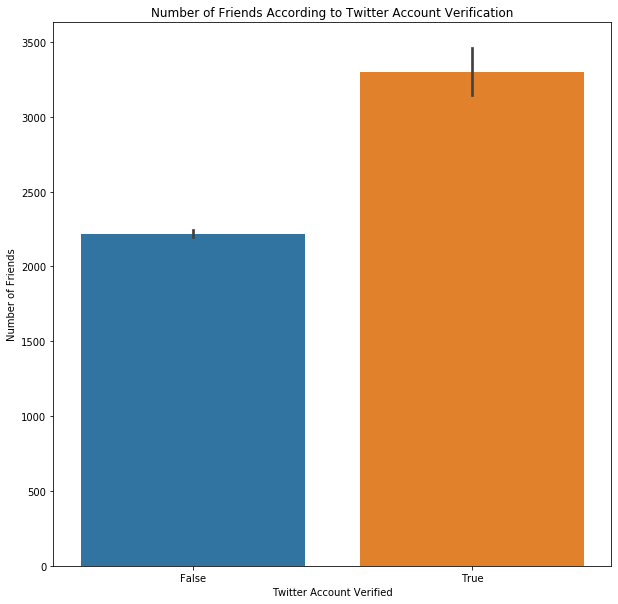

In [9]:
# Create barplot comparing the verified variable to the friends_count variable
plt.figure(figsize=(10,10)) 
ax = sns.barplot(data=df_tweets, x= "verified", y = "friends_count") 
ax.set(xlabel = 'Twitter Account Verified', ylabel = 'Number of Friends', title = 'Number of Friends According to Twitter Account Verification')  
plt.show()

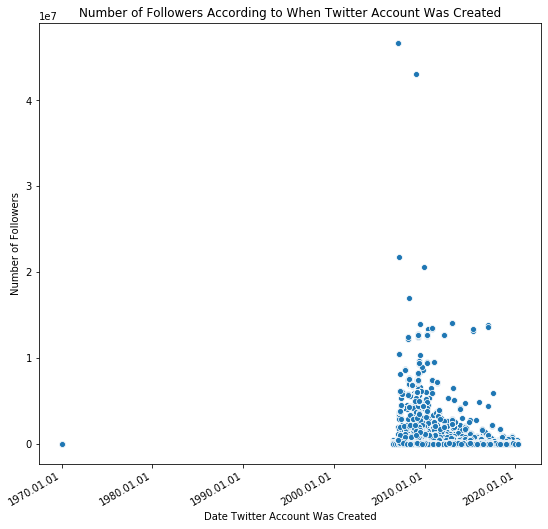

In [10]:
# Create scatterplot comparing the account_created_at variable to the followers_count variable

#Set the account_created_at column to a Datetime format 
df_tweets.account_created_at = pd.to_datetime(df_tweets.account_created_at)

# build the figure
fig, ax = plt.subplots(figsize=(9,9))
plot = sns.scatterplot(data=df_tweets, x= "account_created_at", y = "followers_count") 
plot.set(xlabel = 'Date Twitter Account Was Created', ylabel = 'Number of Followers', title = 'Number of Followers According to When Twitter Account Was Created')  

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

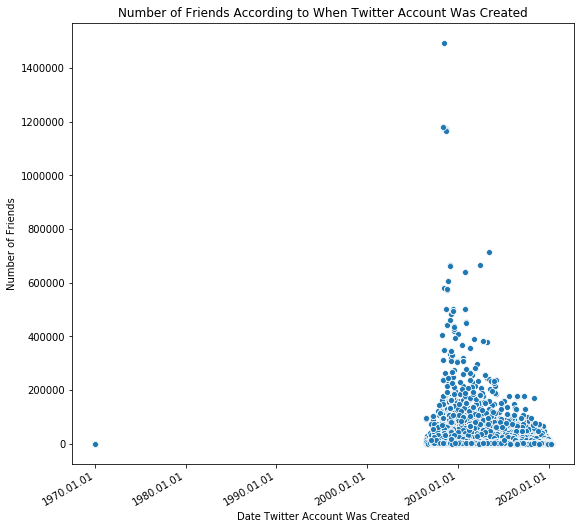

In [11]:
# Create scatterplot comparing the account_created_at variable to the friends_count variable

# build the figure
fig, ax = plt.subplots(figsize=(9,9))
plot = sns.scatterplot(data=df_tweets, x= "account_created_at", y = "friends_count") 
plot.set(xlabel = 'Date Twitter Account Was Created', ylabel = 'Number of Friends', title = 'Number of Friends According to When Twitter Account Was Created')  

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()